Q1

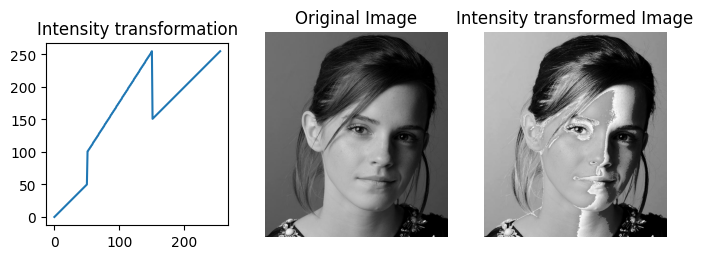

In [111]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50, 50), (50, 100), (150, 255), (150, 150)])
t1 = np.linspace(0, c[0, 1], c[0, 0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[0, 1] + 1 , c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')
t3 = np.linspace(c[1, 1] + 1 , c[2, 1], c[2, 0] - c[1, 0]).astype('uint8')
t4 = np.linspace(c[2, 1] + 1 , c[3, 1], c[3, 0] - c[2, 0]).astype('uint8')
t5 = np.linspace(c[3, 1] + 1 , 255, 255 - c[3, 0]).astype('uint8')
transform = np.concatenate((t1,t2,t3,t4,t5), axis=0).astype('uint8')
img_orig = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_orig, transform)

Q2

(a),(b)

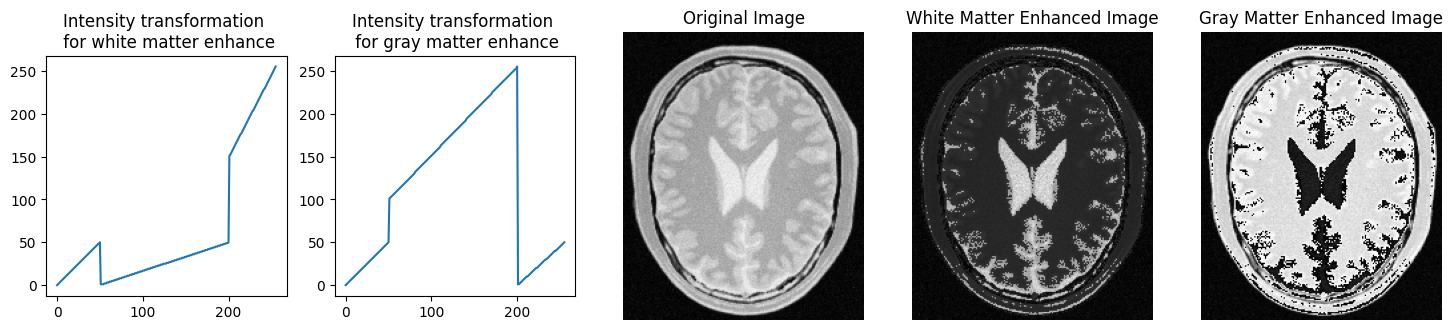

In [21]:
c = np.array([(50, 50), (50, 0), (200, 50), (200, 150)])
t1 = np.linspace(0, c[0, 1], c[0, 0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[0, 1] + 1 , c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')
t3 = np.linspace(c[1, 1] + 1 , c[2, 1], c[2, 0] - c[1, 0]).astype('uint8')
t4 = np.linspace(c[2, 1] + 1 , c[3, 1], c[3, 0] - c[2, 0]).astype('uint8')
t5 = np.linspace(c[3, 1] + 1 , 255, 255 - c[3, 0]).astype('uint8')

s = np.array([(50, 50), (50, 100), (200, 255), (200, 0)])
s1 = np.linspace(0, s[0, 1], s[0, 0] + 1 - 0).astype('uint8')
s2 = np.linspace(s[0, 1] + 1 , s[1, 1], s[1, 0] - s[0, 0]).astype('uint8')
s3 = np.linspace(s[1, 1] + 1 , s[2, 1], s[2, 0] - s[1, 0]).astype('uint8')
s4 = np.linspace(s[2, 1] + 1 , s[3, 1], s[3, 0] - s[2, 0]).astype('uint8')
s5 = np.linspace(s[3, 1] + 1 , 50, 255 - s[3, 0]).astype('uint8')

transform1 = np.concatenate((t1, t2,t3,t4,t5), axis=0).astype('uint8')
transform2 = np.concatenate((s1, s2,s3,s4,s5), axis=0).astype('uint8')

g = cv.LUT(img_orig,transform1)
h = cv.LUT(img_orig,transform2)

Q3 a,b

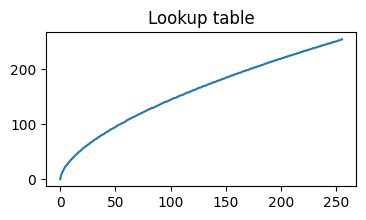

Gamma = 0.6


In [47]:
f = cv.imread(r'highlights_and_shadows.jpg',cv.IMREAD_COLOR)
original = cv.cvtColor(f,cv.COLOR_BGR2RGB)
lab = cv.cvtColor(f,cv.COLOR_BGR2Lab)
L, a, b = cv.split(lab)
gamma = 0.6
t = np.array([(p/255.0)**(gamma)*255.0 for p in range (0,256)]).astype('uint8')
print("Gamma =", gamma)


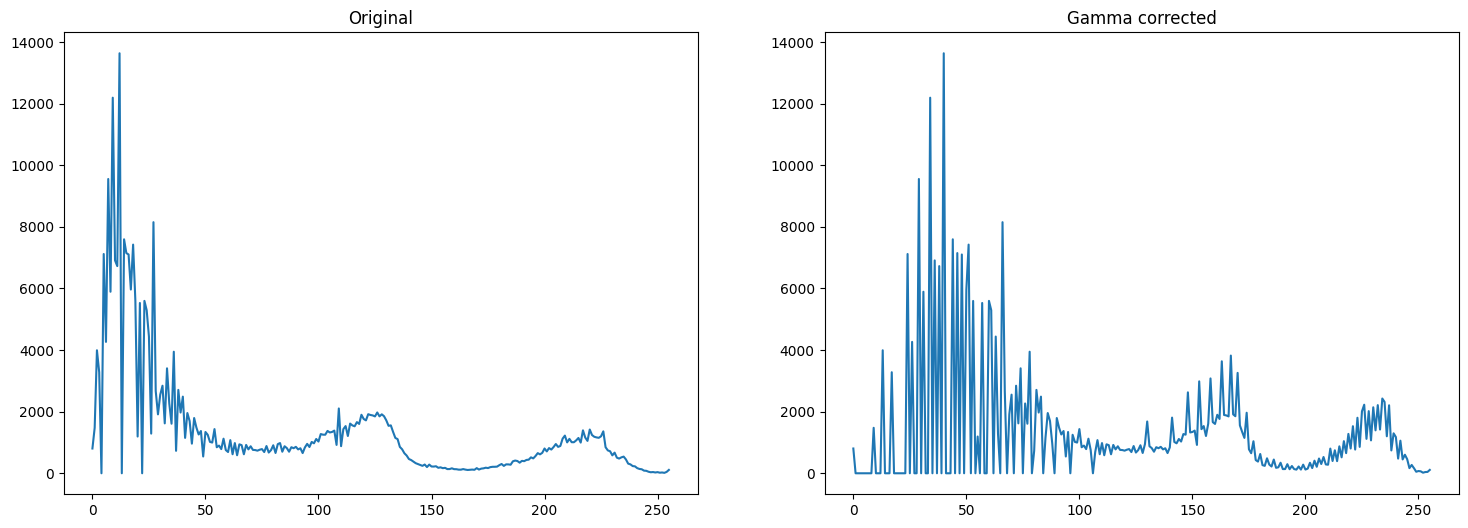

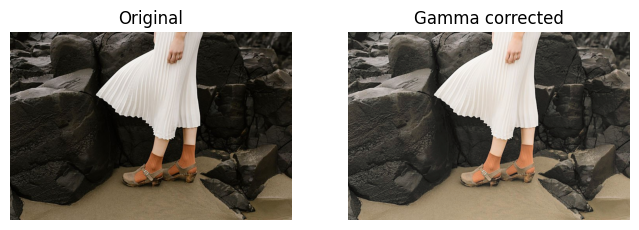

In [73]:
g = cv.LUT(L, t)
lab_orig = cv.cvtColor(f,cv.COLOR_BGR2Lab)
lab[:,:,0] = g
img = cv.cvtColor(lab, cv.COLOR_Lab2RGB).astype('uint8')
hist_original = cv.calcHist([lab_orig],[0],None,[256],[0,256])
hist_gamma = cv.calcHist([lab],[0],None,[256],[0,256])

Q4

(a)

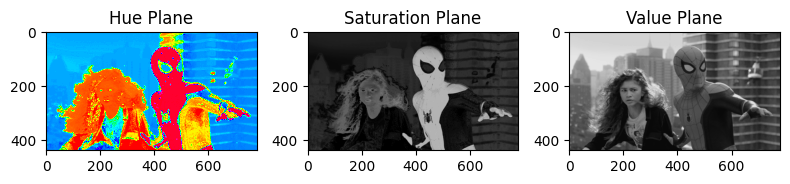

In [81]:
pil_image = Image.open(image_path)
image_np = np.array(pil_image)
hsv_image = cv2.cvtColor(image_np, cv2.COLOR_RGB2HSV)

planes = [hsv_image[:,:,0], hsv_image[:,:,1], hsv_image[:,:,2]]
titles = ['Hue Plane', 'Saturation Plane', 'Value Plane']

(b)

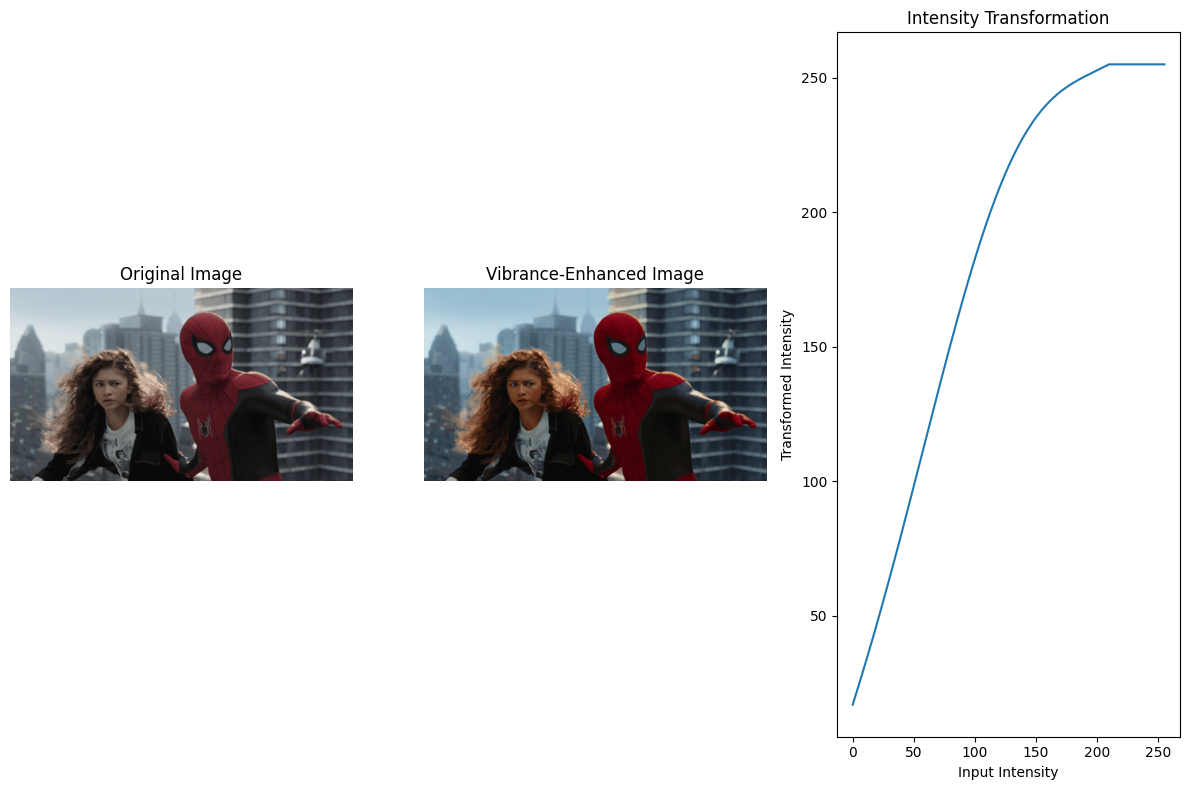

(None, None)

In [84]:
a, sigma = 0.7, 70
x = np.arange(256)
y = np.minimum(x + a * 128 * np.exp(-(x - 128)**2 / (2 * sigma**2)), 255)

transformed_saturation_plane = y[saturation_plane]
transformed_saturation_plane = np.clip(transformed_saturation_plane, 0, 255)

hue_plane, transformed_saturation_plane, value_plane = hue_plane.astype(np.uint8), transformed_saturation_plane.astype(np.uint8), value_plane.astype(np.uint8)
vibrance_enhanced_hsv_image = np.stack([hue_plane, transformed_saturation_plane, value_plane], axis=-1)
vibrance_enhanced_image = cv2.cvtColor(vibrance_enhanced_hsv_image, cv2.COLOR_HSV2BGR)


Q5

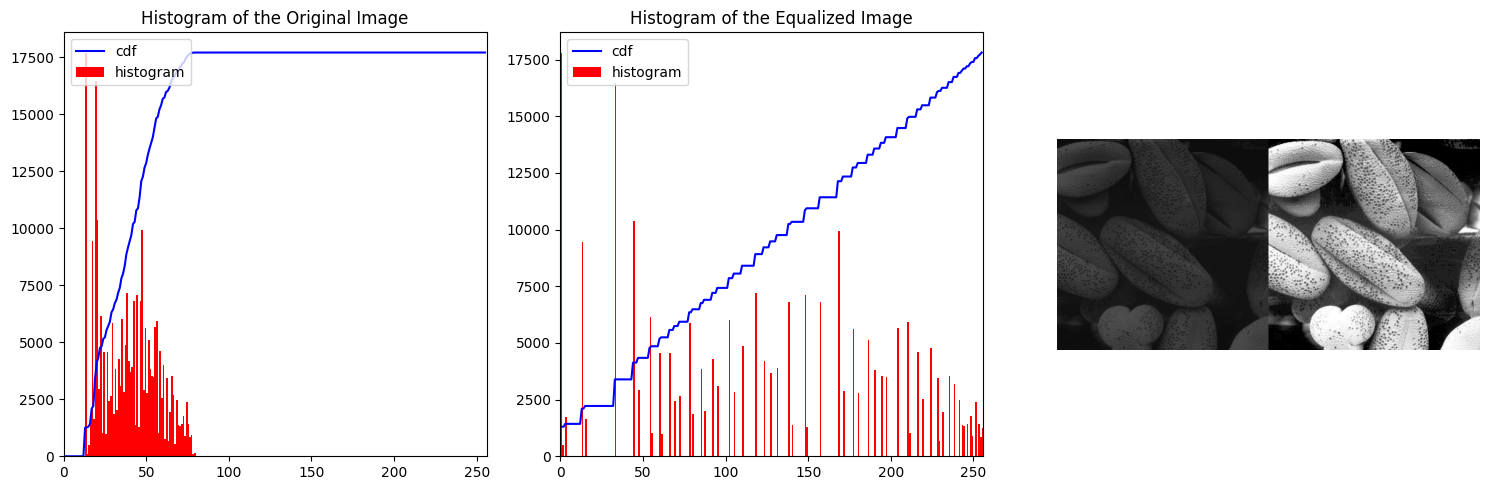

In [88]:
hist, bins = np.histogram(img.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

equ = cv.equalizeHist(img)
hist, bins = np.histogram(equ.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

Q6

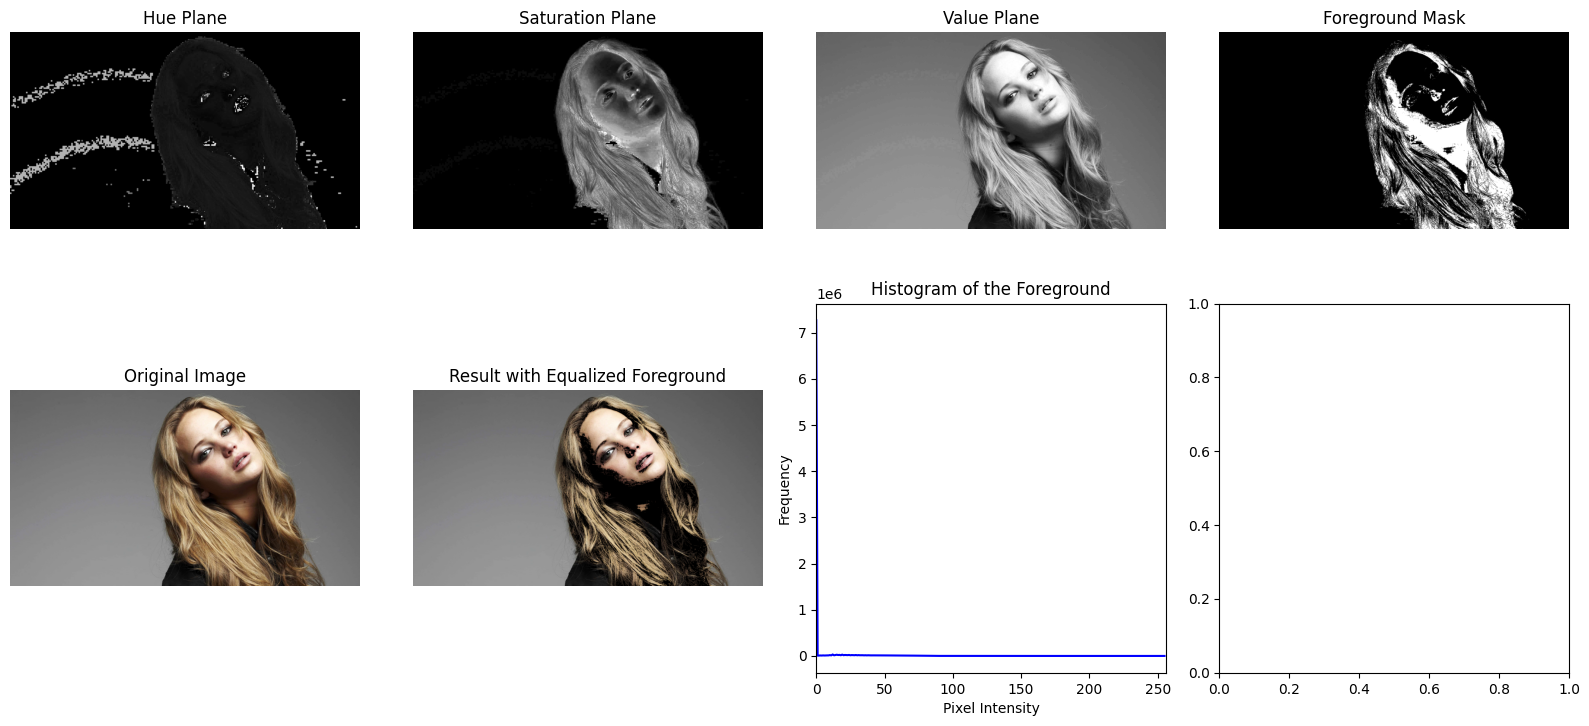

In [107]:

threshold_plane = hsv[:, :, 1]
_, mask = cv2.threshold(threshold_plane, 120, 255, cv2.THRESH_BINARY)

foreground = cv2.bitwise_and(image, image, mask=mask)
hist = cv2.calcHist([foreground], [0], None, [256], [0, 256])
cumulative = np.cumsum(hist)
cumulative_normalized = cumulative / cumulative[-1]

# Apply histogram equalization to the foreground
equalized_foreground = np.interp(foreground[:, :, 0], np.arange(256), cumulative_normalized).astype(np.uint8)
background_mask = cv2.bitwise_not(mask)
background = cv2.bitwise_and(image, image, mask=background_mask)
result_image = cv2.add(background, cv2.cvtColor(equalized_foreground, cv2.COLOR_GRAY2BGR))



Q7

(a)

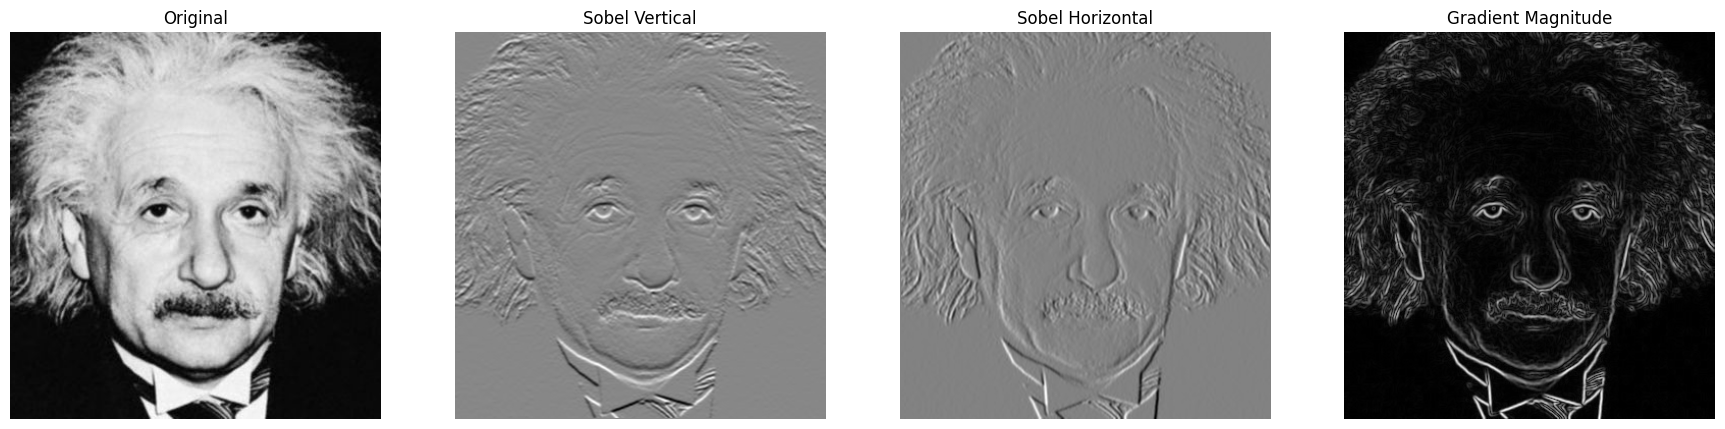

In [94]:
sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype='float')
f_x = cv.filter2D(f, -1, sobel_v)
sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype='float')
f_y = cv.filter2D(f, -1, sobel_h)
grad = np.sqrt(f_x**2 + f_y**2)

(b)

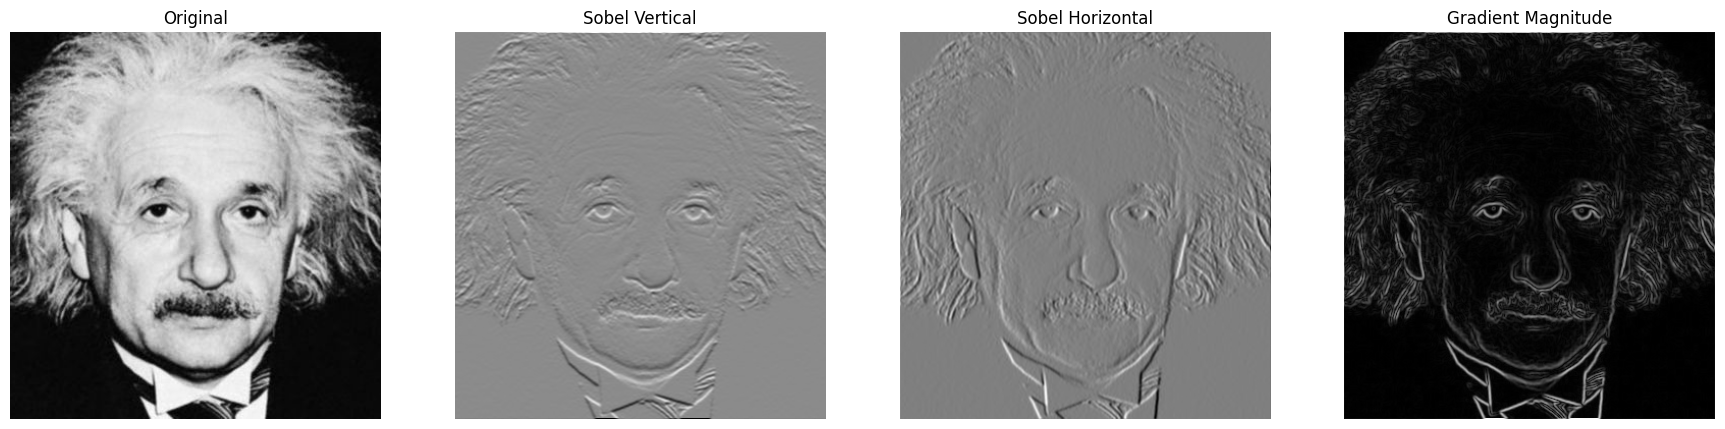

In [95]:
def convolution2d(image, kernel):
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return new_image

f = cv.imread(r'einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert f is not None
rows, cols = f.shape[0] , f.shape[1]
sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype='float')
sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype='float')
grad = np.sqrt(f_x**2 + f_y**2)
padded = np.zeros((rows+2,cols+2))
for i in range(rows):
    for j in range(cols):
        padded[i+1,j+1] = f[i,j]

f_x = convolution2d(padded, sobel_v)
f_y = convolution2d(padded, sobel_h)
grad = np.sqrt(f_x**2 + f_y**2)


(c)

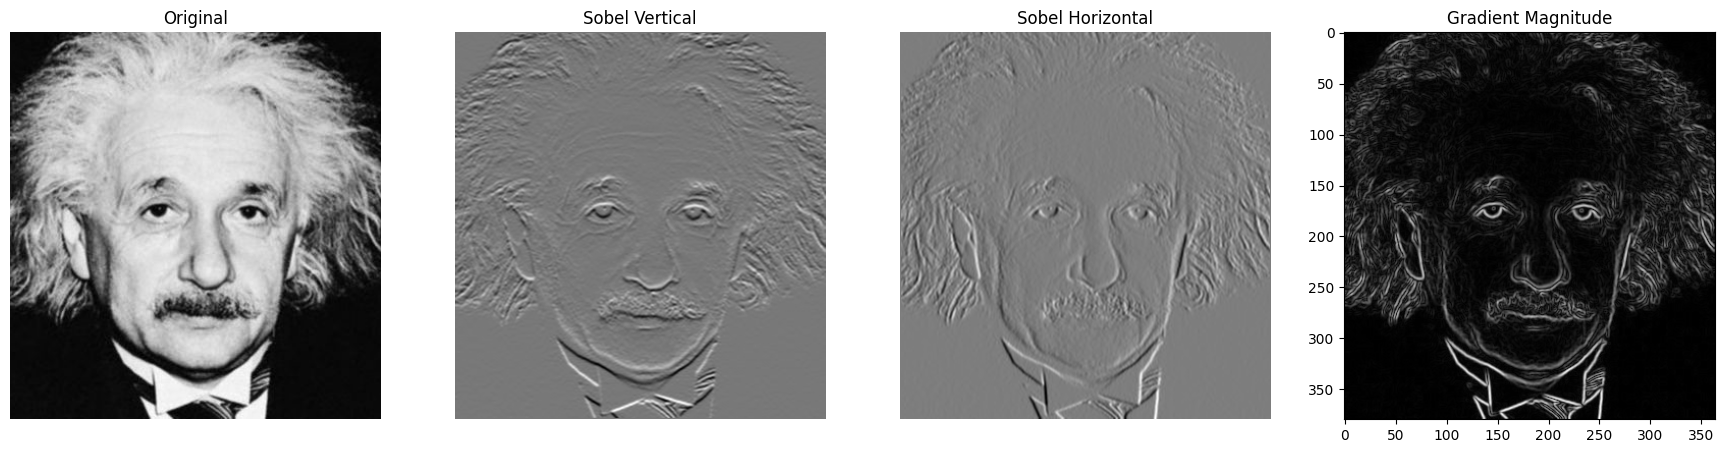

In [96]:
f = cv.imread(r'einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
sobel_h1 = np.array([[1],[2],[1]], dtype='float')
sobel_h2 = np.array([[1,0,-1]],dtype='float')
sobel_v1 = np.array([[-1],[0],[1]], dtype='float')
sobel_v2 = np.array([[-1,-2,-1]],dtype='float')
f_y1 = cv.filter2D(f, -1, sobel_h1)
f_y2 = cv.filter2D(f_y1, -1, sobel_h2)
f_x1 = cv.filter2D(f, -1, sobel_v1)
f_x2 = cv.filter2D(f_x1, -1, sobel_v2)
grad = np.sqrt(f_x2**2 + f_y2**2)

Q8

In [ ]:
originals = ["im01small.png", "im02small.png", "im03small.png", "im04small.png", "im05small.png", "im06small.png", "im07small.png", "im08small.png", "im09small.png", "im10small.png", "im11small.png"]
zoomed_outs = ["im01.png", "im02.png", "im03.png", "im04.png", "im05.png", "im06.png", "im07.png", "im08.png", "im09.png", "im10.png", "im11.png"]

for i in range(11):
    img = cv.imread(originals[i])
    img1 = cv.imread(zoomed_outs[i]) 
    img_resized = cv.resize(img, None, fx=4, fy=4, interpolation=cv.INTER_NEAREST)
    bilinear_img = cv.resize(img, img_resized.shape[1::-1], interpolation=cv.INTER_LINEAR)
    ssd_near = np.sum((img_resized - img_resized) ** 2)  # Nearest-neighbor SSD is zero
    ssd_bilinear = np.sum((img_resized - bilinear_img) ** 2)
    max_possible_ssd = np.sum((img_resized - np.zeros_like(img_resized)) ** 2)
    normalized_ssd_near = ssd_near / max_possible_ssd
    normalized_ssd_bilinear = ssd_bilinear / max_possible_ssd

Q9

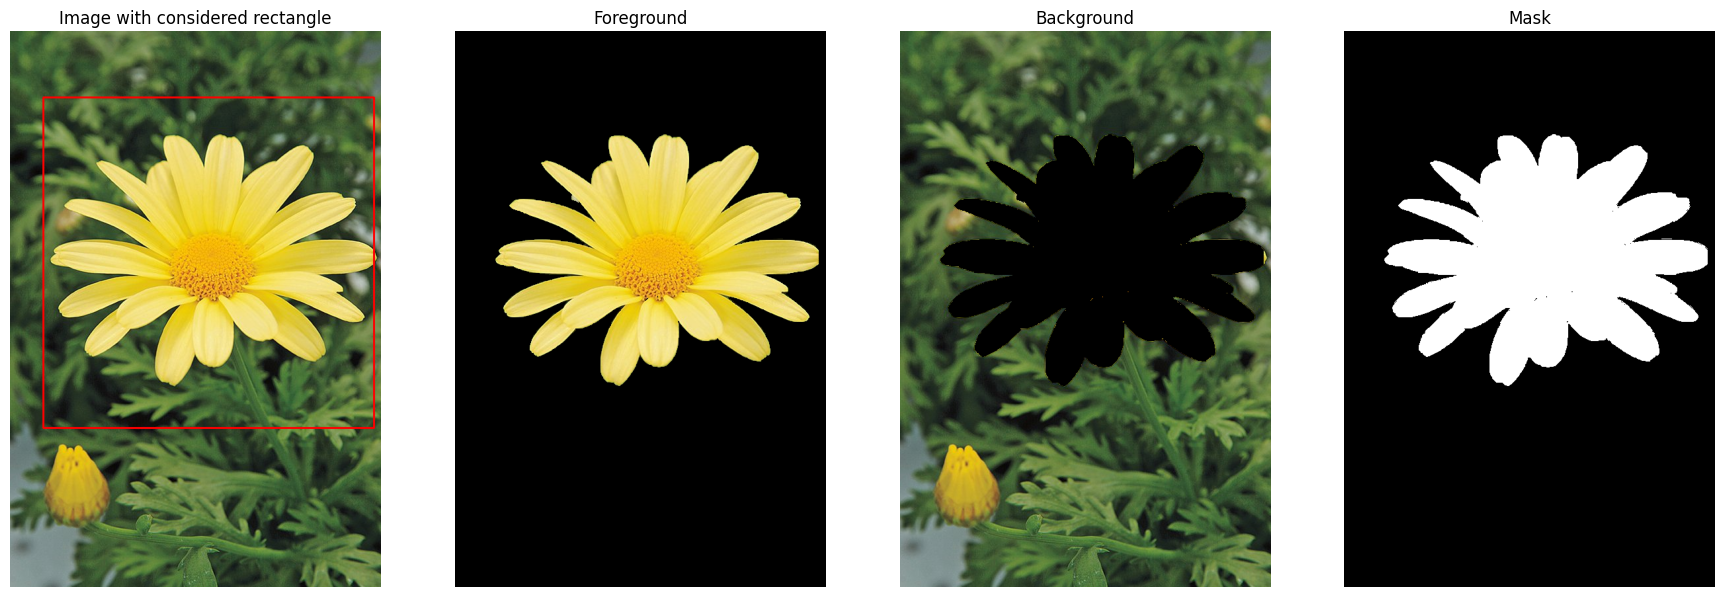

In [109]:
im = cv2.imread('daisy.jpg')
orig = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
mask = np.zeros(im.shape[:2], np.uint8)
bgdModel, fgdModel = np.zeros((1, 65), np.float64), np.zeros((1, 65), np.float64)
rect = (50, 100, 500, 500)
cv2.grabCut(im, mask, rect, bgdModel, fgdModel, 3, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
FG, BG = im * mask2[:, :, np.newaxis], im - (im * mask2[:, :, np.newaxis])
cv2.rectangle(orig, (50, 100), (550, 600), (255, 0, 0), 2)


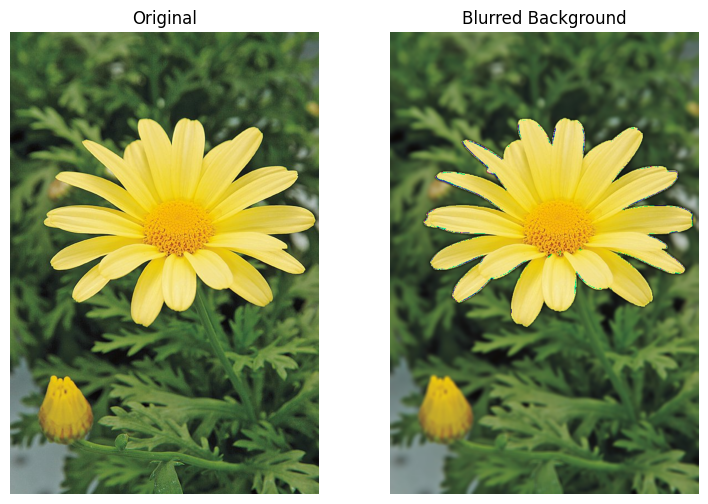

In [110]:
sigma = 4
BG_gauss = cv.GaussianBlur(BG,(7,7),sigma)
blurred_im= np.add(FG,BG_gauss)